<a href="https://colab.research.google.com/github/madra234/Kaggle_data_amaliyot/blob/main/Bank_mijozlarini_qarzini_qaytarish_pragnozi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [138]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [139]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15702656.0,Nwora,567.0,France,Male,33.0,9.0,0.0,2.0,1.0,0.0,156792.89,0.0
1,1,15647965.0,Yevdokimova,628.0,France,Female,38.0,3.0,0.0,1.0,1.0,1.0,51987.99,1.0
2,2,15798834.0,Ch'iu,635.0,France,Female,29.0,3.0,0.0,2.0,1.0,1.0,113079.19,0.0
3,3,15672056.0,Hsia,681.0,France,Male,28.0,6.0,0.0,2.0,1.0,0.0,14081.64,0.0
4,4,15759537.0,Okwudilichukwu,587.0,France,Female,27.0,5.0,0.0,2.0,1.0,0.0,158958.90,0.0


In [140]:
train['Geography'].value_counts()

,count
Geography,
France,9040
Spain,3280
Germany,2680


In [141]:
train.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,1.579454e+07,657.856800,37.710133,5.018667,42338.107539,1.590533,0.779133,0.496000,116944.059867,0.198467
std,4330.271354,1.268495e+07,72.678739,8.144880,2.787407,59703.047751,0.525822,0.414845,0.500001,46047.485455,0.398859
min,0.000000,1.567151e+05,431.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,3749.750000,1.563435e+07,602.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,82644.332500,0.000000
50%,7499.500000,1.568947e+07,661.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,122449.420000,0.000000
75%,11249.250000,1.575682e+07,707.000000,42.000000,7.000000,109636.342500,2.000000,1.000000,1.000000,155703.022500,0.000000
max,14999.000000,1.569172e+09,850.000000,72.000000,10.000000,187911.550000,5.000000,1.000000,1.000000,885120.790000,1.000000


In [142]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


In [143]:
train.shape

(15000, 14)

In [144]:
train = train.drop(columns=['Surname'], errors='ignore')

In [145]:
train.head()

,id,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15702656.0,567.0,France,Male,33.0,9.0,0.0,2.0,1.0,0.0,156792.89,0.0
1,1,15647965.0,628.0,France,Female,38.0,3.0,0.0,1.0,1.0,1.0,51987.99,1.0
2,2,15798834.0,635.0,France,Female,29.0,3.0,0.0,2.0,1.0,1.0,113079.19,0.0
3,3,15672056.0,681.0,France,Male,28.0,6.0,0.0,2.0,1.0,0.0,14081.64,0.0
4,4,15759537.0,587.0,France,Female,27.0,5.0,0.0,2.0,1.0,0.0,158958.90,0.0


In [146]:
train.replace({"Gender":{'Female': 0, 'Male': 1}, 'Geography':{'France':0, 'Spain':1, "Germany":2}}, inplace=True)

/tmp/ipython-input-146-4084456537.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train.replace({"Gender":{'Female': 0, 'Male': 1}, 'Geography':{'France':0, 'Spain':1, "Germany":2}}, inplace=True)


In [147]:
train['Geography'].value_counts()

,count
Geography,
0,9040
1,3280
2,2680


In [148]:
train.head()

,id,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15702656.0,567.0,0,1,33.0,9.0,0.0,2.0,1.0,0.0,156792.89,0.0
1,1,15647965.0,628.0,0,0,38.0,3.0,0.0,1.0,1.0,1.0,51987.99,1.0
2,2,15798834.0,635.0,0,0,29.0,3.0,0.0,2.0,1.0,1.0,113079.19,0.0
3,3,15672056.0,681.0,0,1,28.0,6.0,0.0,2.0,1.0,0.0,14081.64,0.0
4,4,15759537.0,587.0,0,0,27.0,5.0,0.0,2.0,1.0,0.0,158958.90,0.0


In [ ]:
# scaler = StandardScaler()
# train = scaler.fit_transform(train)

In [149]:
print(train)

          id  CustomerId  CreditScore  Geography  Gender   Age  Tenure  \
0          0  15702656.0        567.0          0       1  33.0     9.0   
1          1  15647965.0        628.0          0       0  38.0     3.0   
2          2  15798834.0        635.0          0       0  29.0     3.0   
3          3  15672056.0        681.0          0       1  28.0     6.0   
4          4  15759537.0        587.0          0       0  27.0     5.0   
...      ...         ...          ...        ...     ...   ...     ...   
14995  14995  15733888.0        581.0          0       1  35.0     1.0   
14996  14996  15740164.0        806.0          2       1  42.0     1.0   
14997  14997  15629002.0        620.0          0       0  29.0     7.0   
14998  14998  15684548.0        622.0          2       1  51.0     6.0   
14999  14999  15572361.0        543.0          0       1  36.0     8.0   

         Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0           0.00            2.0 

In [150]:
x = train.drop(columns=[ 'id' ,'CustomerId' ,'Exited'], axis=1)
y = train['Exited']

In [151]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [152]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x.shape, x_train.shape, x_test.shape)

(15000, 10) (12000, 10) (3000, 10)


SVC model(kernel)

In [153]:
from sklearn import svm

In [154]:
classifire = svm.SVC(kernel='linear')
classifire.fit(x_train, y_train)

SVC(kernel='linear')

In [155]:
x_train_prediction = classifire.predict(x_train)
training_data_accuracy = classifire.score(x_train, y_train)

In [156]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.8693333333333333


In [157]:
x_test_prediction = classifire.predict(x_test)
test_data_accuracy = classifire.score(x_test, y_test)

In [158]:
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.876


model: RandomForestClassifier

In [159]:
from sklearn.ensemble import RandomForestClassifier


In [160]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [161]:
x_train_prediction = model.predict(x_train)
training_data_accuracy = model.score(x_train, y_train)

In [162]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  1.0


In [163]:
x_test_prediction = model.predict(x_test)
test_data_accuracy = model.score(x_test, y_test)

In [164]:
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.891


model: XGBClassifier

In [165]:
from xgboost import XGBClassifier

In [166]:
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [167]:
x_train_prediction = xgb_model.predict(x_train)
training_data_accuracy = xgb_model.score(x_train, y_train)

In [168]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.9656666666666667


In [169]:
x_test_prediction = xgb_model.predict(x_test)
test_data_accuracy = xgb_model.score(x_test, y_test)

In [170]:
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.8836666666666667


In [171]:
from sklearn.linear_model import LogisticRegression

model: LogisticRegression

In [172]:
LR_model = LogisticRegression()
LR_model.fit(x_train, y_train)

LogisticRegression()

In [173]:
x_train_prediction = LR_model.predict(x_train)
training_data_accuracy = LR_model.score(x_train, y_train)

In [174]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.8695


In [175]:
x_test_prediction = LR_model.predict(x_test)
test_data_accuracy = LR_model.score(x_test, y_test)

In [176]:
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.8736666666666667


#Datasetimizda qo'llanilgan modelllarni grafik modellar bilan ko'rsatilgan

In [177]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, roc_curve, accuracy_score
)

In [178]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "SVC": SVC(probability=True)  # ROC AUC uchun probability=True
}


📌 Model: Logistic Regression
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92      2424
         1.0       0.75      0.51      0.61       576

    accuracy                           0.87      3000
   macro avg       0.82      0.74      0.77      3000
weighted avg       0.87      0.87      0.86      3000

ROC AUC: 0.8820

📌 Model: Random Forest
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93      2424
         1.0       0.75      0.66      0.70       576

    accuracy                           0.89      3000
   macro avg       0.84      0.80      0.82      3000
weighted avg       0.89      0.89      0.89      3000

ROC AUC: 0.9293


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:04:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📌 Model: XGBoost
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93      2424
         1.0       0.71      0.66      0.69       576

    accuracy                           0.88      3000
   macro avg       0.82      0.80      0.81      3000
weighted avg       0.88      0.88      0.88      3000

ROC AUC: 0.9250

📌 Model: SVC
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      2424
         1.0       0.79      0.64      0.70       576

    accuracy                           0.90      3000
   macro avg       0.85      0.80      0.82      3000
weighted avg       0.89      0.90      0.89      3000

ROC AUC: 0.9049


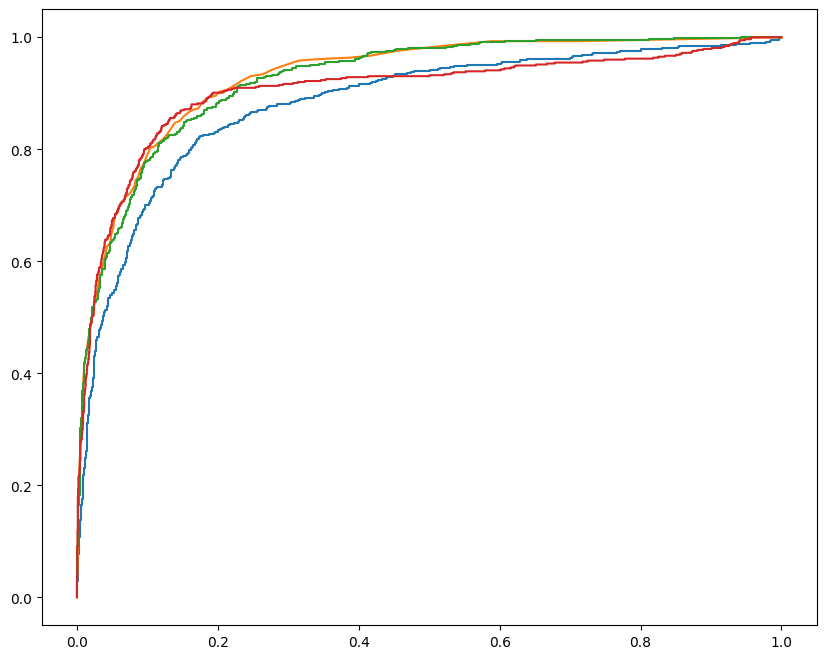

In [179]:
results = {}
plt.figure(figsize=(10, 8))

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1]

    print(f"\n Model: {name}")
    print(classification_report(y_test, y_pred))
    print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})")

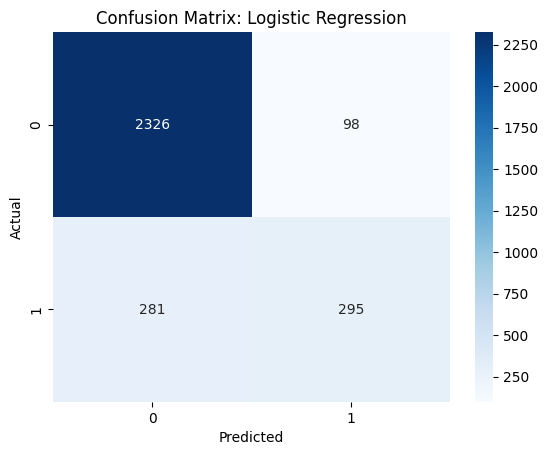

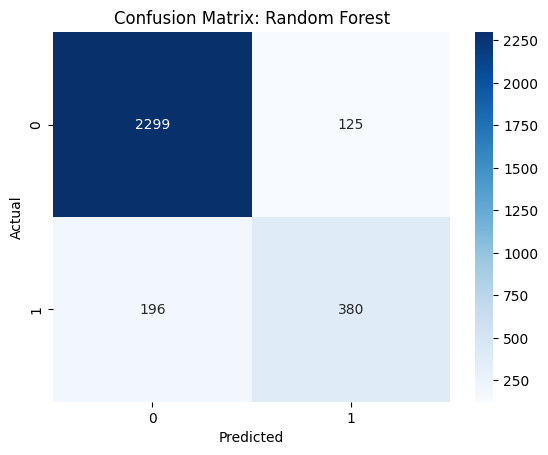

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:05:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


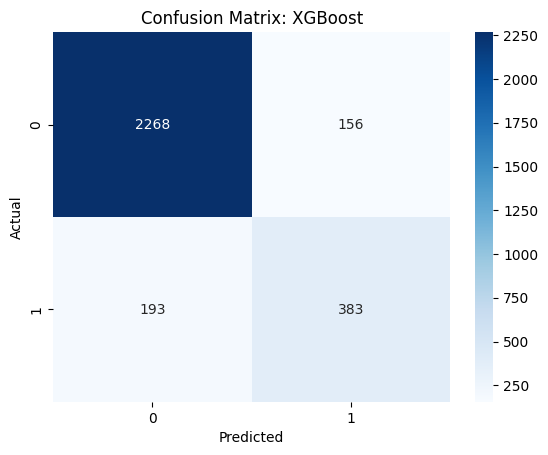

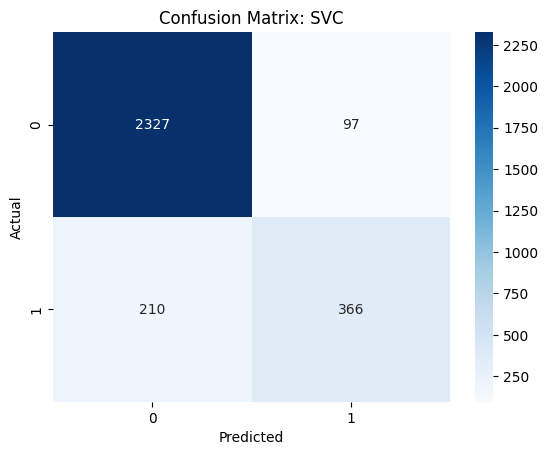

In [180]:
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1]
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_proba),
        "F1-score": classification_report(y_test, y_pred, output_dict=True)["weighted avg"]["f1-score"]
    }

In [181]:
test = test.drop(columns=['Surname'], errors='ignore')

In [182]:
test.head()


,id,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15732563.0,707.0,Germany,Male,21.0,4.0,114513.66,2.0,1.0,0.0,176692.87
1,15001,15727041.0,678.0,Germany,Male,33.0,5.0,142510.50,1.0,0.0,0.0,52820.13
2,15002,15753679.0,636.0,Spain,Male,45.0,9.0,0.00,2.0,1.0,1.0,125062.02
3,15003,15581554.0,697.0,Spain,Male,46.0,8.0,0.00,2.0,1.0,0.0,131647.41
4,15004,15773723.0,553.0,Spain,Male,31.0,2.0,0.00,2.0,1.0,0.0,58814.41


In [183]:
test.replace({"Gender":{'Female': 0, 'Male': 1}, 'Geography':{'France':0, 'Spain':1, "Germany":2}}, inplace=True)

/tmp/ipython-input-183-2884429047.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test.replace({"Gender":{'Female': 0, 'Male': 1}, 'Geography':{'France':0, 'Spain':1, "Germany":2}}, inplace=True)


In [184]:
test.sample(5)

,id,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
538,15538,15626985.0,758.0,0,1,57.0,6.0,0.00,1.0,1.0,0.0,176791.27
3690,18690,15635078.0,667.0,0,1,42.0,9.0,0.00,1.0,1.0,1.0,171922.72
6241,21241,15718789.0,677.0,2,1,38.0,5.0,121326.42,1.0,0.0,1.0,60905.51
5894,20894,15729954.0,724.0,0,0,43.0,4.0,0.00,2.0,0.0,1.0,28778.98
6785,21785,15752801.0,691.0,0,1,30.0,2.0,0.00,2.0,1.0,1.0,129964.94


In [185]:
ids = test['id']

In [186]:
X_submission = test

In [187]:
X_submission = X_submission.drop(['id', 'CustomerId'], axis=1)

In [188]:
X_submission.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,707.0,2,1,21.0,4.0,114513.66,2.0,1.0,0.0,176692.87
1,678.0,2,1,33.0,5.0,142510.50,1.0,0.0,0.0,52820.13
2,636.0,1,1,45.0,9.0,0.00,2.0,1.0,1.0,125062.02
3,697.0,1,1,46.0,8.0,0.00,2.0,1.0,0.0,131647.41
4,553.0,1,1,31.0,2.0,0.00,2.0,1.0,0.0,58814.41


In [189]:
X = scaler.fit_transform(X_submission)

In [190]:
y_pred = model.predict(X)

In [196]:
submission = pd.DataFrame({'id': ids, 'Exited': y_pred})

In [197]:
submission.to_csv('submission.csv', index=False)